In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV#KNN DE EN İYİ PARAMETRELERİ BULMAK İÇİN KULLANILIR
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

B    357
M    212
Name: target, dtype: int64


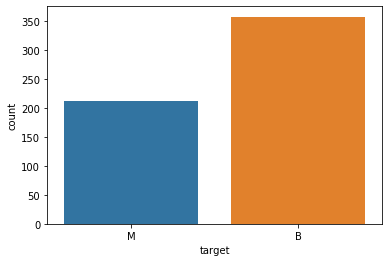

In [26]:
#VERİ SETİ YÜKKLENİR
data= pd.read_csv("cancer.csv")
data.drop(["Unnamed: 32","id"],inplace=True,axis=1)
data=data.rename(columns={"diagnosis":"target"})

sns.countplot(data["target"])
print(data.target.value_counts())#212 ötü huylu 357 tane kötü huylu
#M KÖTÜ HUYLU

In [27]:
data["target"]=[1 if i.strip()=="M" else 0 for i in data.target]
print(len(data))
print(data.head)
print("data shape", data.shape)
data.info()
describe= data.describe()

569
<bound method NDFrame.head of      target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         1        17.99         10.38          122.80     1001.0   
1         1        20.57         17.77          132.90     1326.0   
2         1        19.69         21.25          130.00     1203.0   
3         1        11.42         20.38           77.58      386.1   
4         1        20.29         14.34          135.10     1297.0   
..      ...          ...           ...             ...        ...   
564       1        21.56         22.39          142.00     1479.0   
565       1        20.13         28.25          131.20     1261.0   
566       1        16.60         28.08          108.30      858.1   
567       1        20.60         29.33          140.10     1265.0   
568       0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010    

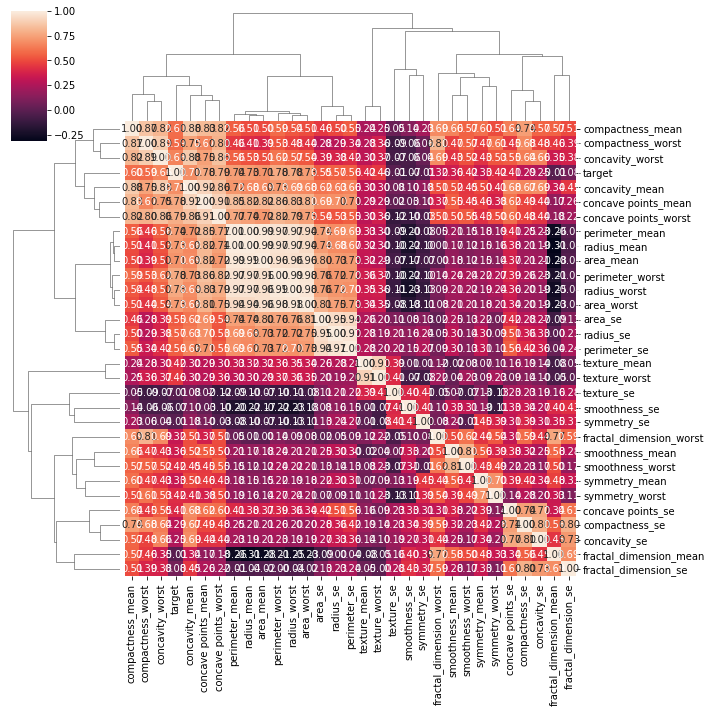

In [28]:
#açıklayıcı veri analizi
#korelasyon matrisi
corr_matrix= data.corr()
sns.clustermap(corr_matrix, annot=True, fmt=".2f")
plt.show()

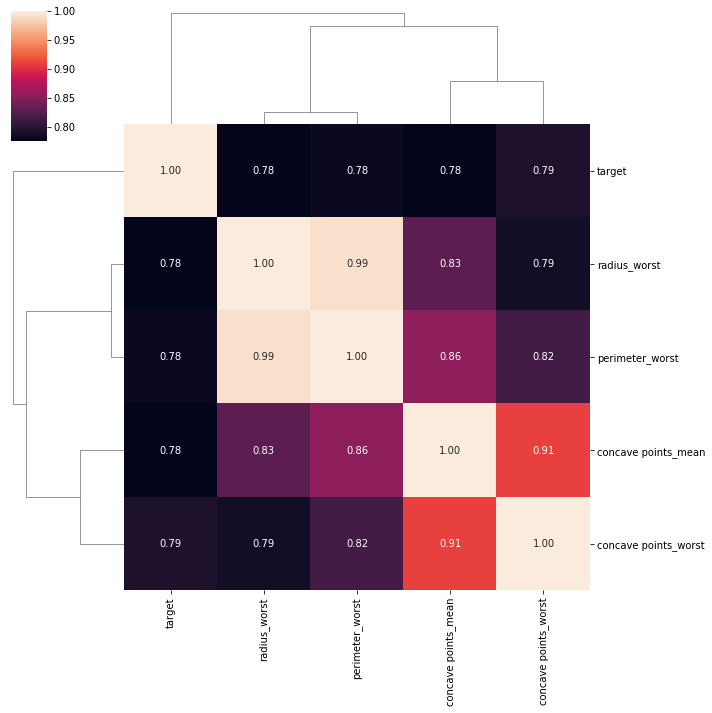

In [29]:
threashold=0.75
filtre= np.abs(corr_matrix["target"]) > threashold
corr_features=corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot= True, fmt= ".2f")


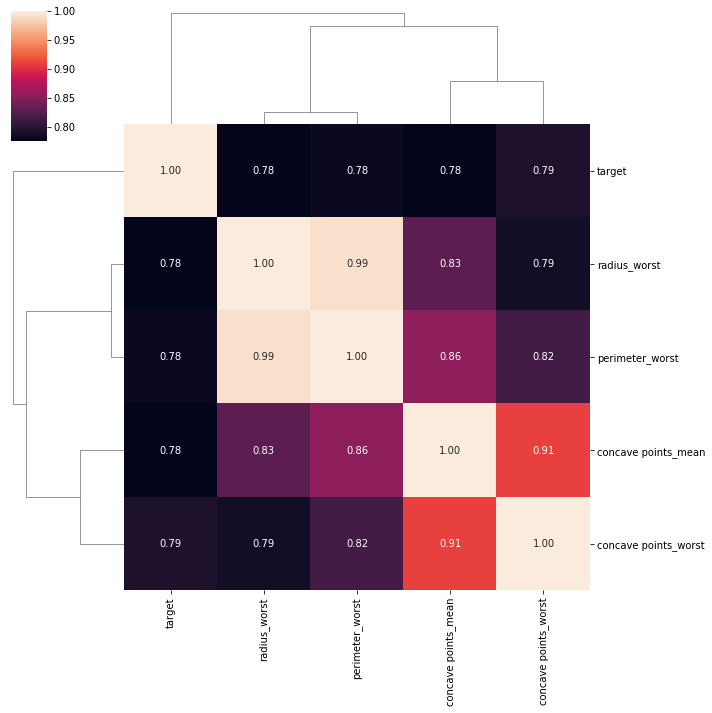

In [30]:
threashold=0.75
filtre= np.abs(corr_matrix["target"]) > threashold
corr_features=corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot= True, fmt= ".2f")


In [31]:
"""ayrık veri tespiti"""
y= data.target
x= data.drop(["target"], axis=1)
columns= x.columns.tolist()
clf=LocalOutlierFactor() 
y_pred= clf.fit_predict(x)
X_score= clf.negative_outlier_factor_

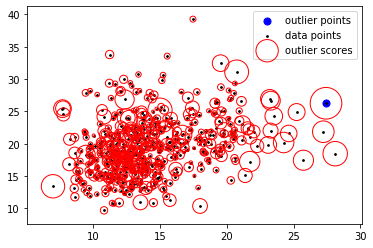

In [32]:
outlier_score= pd.DataFrame()
outlier_score["score"]=X_score

thershold=-2.5
filtre= outlier_score["score"]< thershold
outlier_index= outlier_score[filtre].index.tolist()
plt.figure()
plt.scatter(x.iloc[outlier_index, 0],x.iloc[outlier_index, 1], color= "blue", s=50, label= "outlier points")
plt.scatter(x.iloc[:,0], x.iloc[:,1], color= "k", s=3, label= "data points")
radius = (X_score.max() - X_score)/(X_score.max()- X_score.min())
outlier_score["radius"]= radius
plt.scatter(x.iloc[:,0] , x.iloc[:,1] , s=1000*radius, edgecolors="r",facecolors= "none", label= "outlier scores")
plt.legend()
plt.show()

In [33]:
#outlier çıkarma
x= x.drop(outlier_index)
y= y.drop(outlier_index).values

In [34]:
#eğitim test verilerini oluşturma
test_size=0.3
X_train, X_test, Y_train, Y_test =train_test_split(x, y, test_size=test_size, random_state=42)

In [35]:
#standartlaştırma işlemi
scaler= StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_train)
X_train_df= pd.DataFrame(X_train, columns=columns)


In [36]:
#KNN ALGORİTMASININ UYGULANMASI
knn=KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, Y_train)
y_pred=knn.predict(X_test)#tahmin edilen değerler
skor= knn.score(X_test, Y_test)
print(skor)

ValueError: Found input variables with inconsistent numbers of samples: [171, 397]